# K-Means Algorithm Implementation

### Importing Libraries

In [1]:
import random
import matplotlib.pyplot as plt

### Creating Function & Plotting

Cluster 0: [(8, 4), (9, 3), (7, 3), (8, 3), (7, 4), (9, 4), (7, 5), (8, 5), (5, 2), (6, 1), (4, 1), (5, 1), (6, 2), (4, 2), (5, 3), (6, 3)]
Cluster 1: [(15, 10), (16, 9), (14, 9), (15, 9), (14, 10), (16, 10), (15, 11), (16, 11)]
Cluster 2: [(12, 5), (13, 4), (11, 4), (12, 4), (11, 5), (13, 5), (12, 6), (13, 6)]
Cluster 3: [(2, 10), (2, 9), (3, 8), (3, 9), (2, 8), (3, 10), (4, 9), (4, 10)]
Cluster centers: [[6.5, 2.875], [15.125, 9.875], [12.125, 4.875], [2.875, 9.125]]


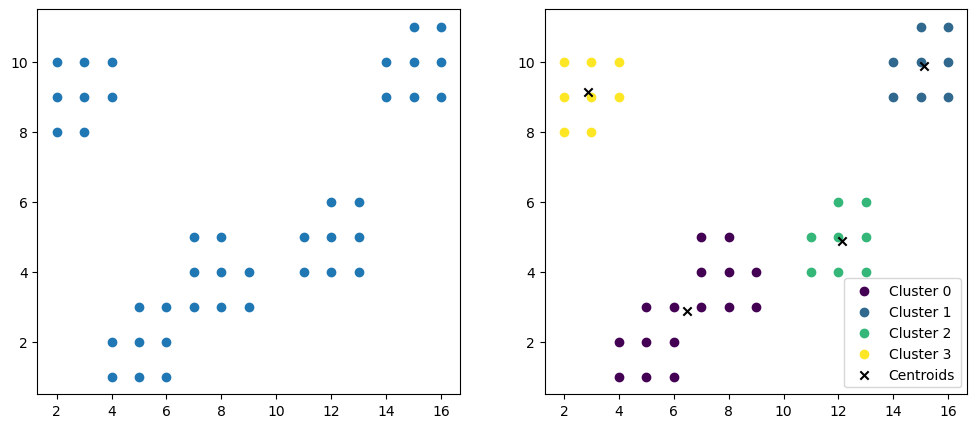

In [2]:
def dist(point1, point2): return sum((x - y) ** 2 for x,y in zip(point1 ,point2)) ** 0.5
def mean(points): return [sum(coord) / len(coord) for coord in zip(*points)]
def kmeans(data,k,max_iterations=1000):
    centroids = random.sample(data,k)
    for i in range(max_iterations):
        clusters = [[] for _ in range(k)]
        for point in data:
            distances = [dist(point ,centroid) for centroid in centroids]
            clusters[distances.index(min(distances))].append(point)
        new_centroids = [mean(cluster) for cluster in clusters]
        if centroids == new_centroids: break
        centroids = new_centroids
    return clusters ,centroids
data = [(2 ,10) ,(2 ,9) ,(3 ,8) ,(3 ,9) ,(2 ,8) ,(3 ,10) ,(4 ,9) ,(4 ,10),(8 ,4) ,(9 ,3) ,(7 ,3) ,(8 ,3) ,(7 ,4) ,(9 ,4) ,(7 ,5) ,(8 ,5),(5 ,2) ,(6 ,1) ,(4 ,1) ,(5 ,1) ,(6 ,2) ,(4 ,2) ,(5 ,3) ,(6 ,3),(15 ,10) ,(16 ,9) ,(14 ,9) ,(15 ,9) ,(14 ,10) ,(16 ,10),(15 ,11),(16 ,11),(12 ,5),(13 ,4),(11 ,4),(12 ,4),(11 ,5),(13 ,5),(12 ,6),(13 ,6)]
k = 4
clusters, centroids = kmeans(data,k)
# Plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].scatter([i[0] for i in data], [i[1] for i in data])
for i in range(k):
    x,y = zip(*clusters[i])
    axes[1].scatter(x,y,color=plt.colormaps['viridis'](plt.Normalize(vmin=0,vmax=k-1)(i)),label=f'Cluster {i}')
x,y = zip(*centroids)
axes[1].scatter(x,y,c='k',marker='x',label='Centroids')
axes[1].legend()
# Printing
for i in range(len(clusters)): print("Cluster "+str(i)+": "+str(clusters[i])) 
print("Cluster centers:", centroids)